In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.utils import Bunch
import math
 
 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Data Science Project')

ModuleNotFoundError: No module named 'google'

In [111]:
def load_dataset(csv_name):
  df = pd.read_csv('Datasets/'+csv_name)
  features = df.columns[:-1]
  target = df.columns[-1]
  X = df[features]
  y = df[target]
  return Bunch(data=X,target=y)

def drop_features(dataset,cols):
  return Bunch(data=dataset.data.drop(cols,axis=1),target=dataset.target.copy())

def draw_feature_distribution(data, n_columns=3, bins = 'auto'):
  df = pd.DataFrame(data)
  n_rows = math.ceil(len(df.columns) / n_columns)
  f = plt.figure(figsize=(7*n_columns,4 * n_rows))
  for i, col in enumerate(df.columns.to_list(),1):
    f.add_subplot(n_rows,n_columns,i)
    sns.histplot(df[col],bins=bins)

def count_statistics(dataset):
  X = dataset.data
  mode = X.mode(dropna=False).xs(0)
  mode.name = 'mode'
  return X.describe().drop(['count']).append(mode)


def draw_feature_boxplots(dataset, n_columns=3):
  X = dataset.data
  y = dataset.target
  df = pd.DataFrame(X)
  n_rows = math.ceil(len(df.columns) / n_columns)
  f = plt.figure(figsize=(7*n_columns,4 * n_rows))
  for i, col in enumerate(df.columns.to_list(),1):
    f.add_subplot(n_rows,n_columns,i)
    sns.boxplot(
      x=y.name,
      y=col,
      data=pd.concat([X[col],y],axis=1)
    )

# Heart Failure Prediction
There is 299 records, which have 13 axis, where are 12 features and 1 binary class.

There is no missing values in any of feature.
Features *anaemia*, *diabetes*, *high_blood_pressure* and *sex* are binary. Basic statistics for non-boolean fatures were counted. The 50 percentile is the same as the median.



In [106]:
dataset_csv_name = 'heart_failure_clinical_records_dataset.csv'

In [107]:
pd.read_csv('Datasets/'+dataset_csv_name)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


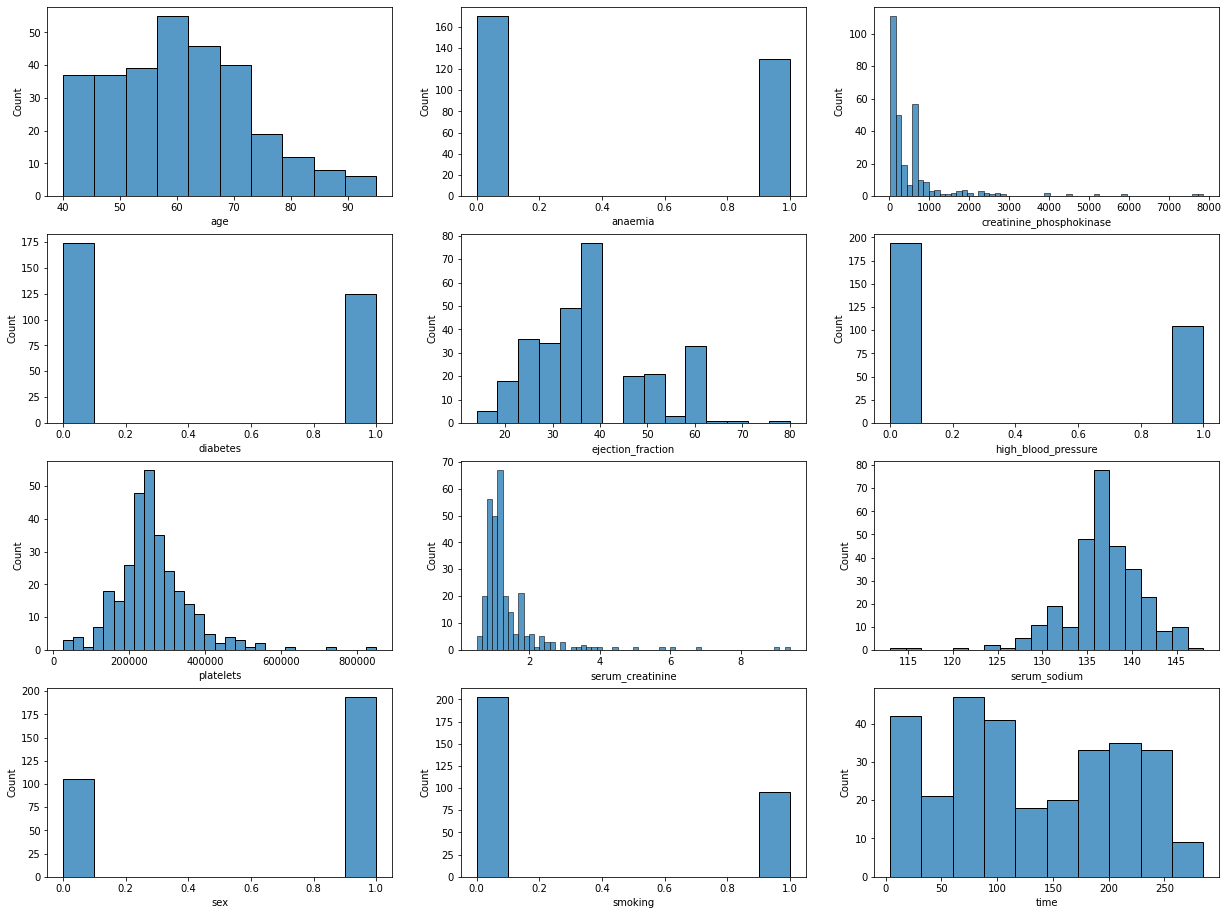

In [112]:
dataset = load_dataset(dataset_csv_name)
draw_feature_distribution(dataset.data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

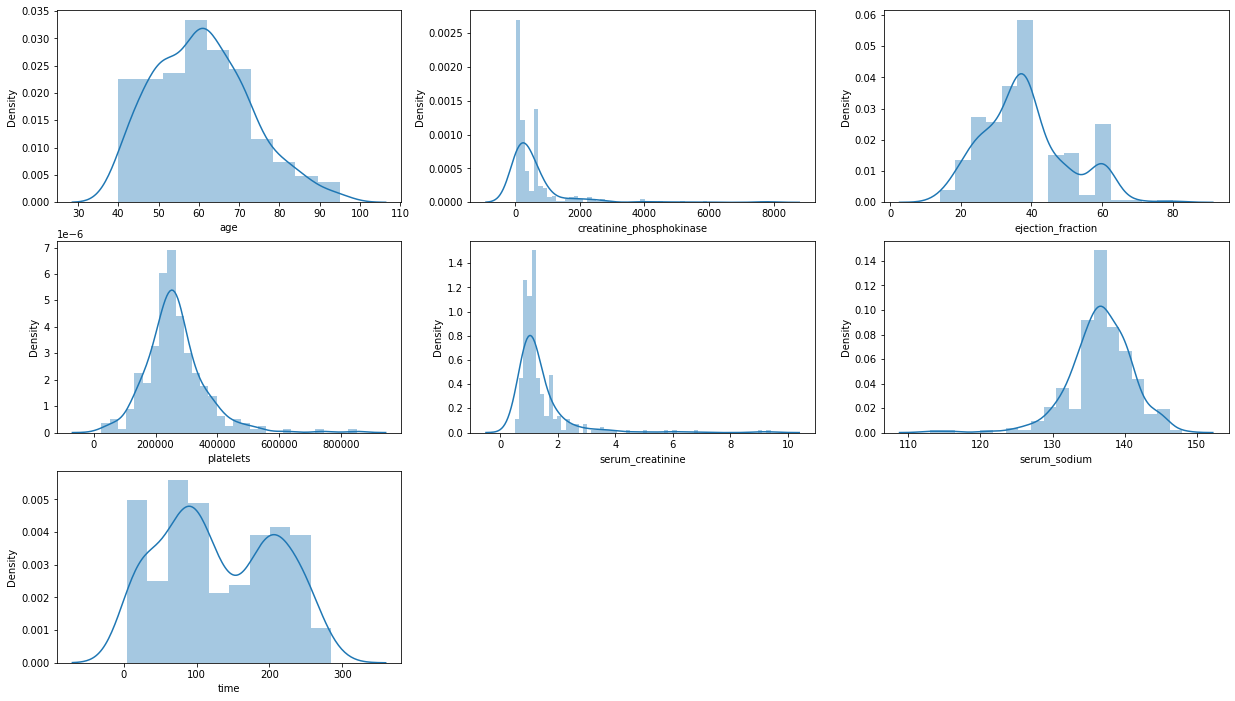

In [7]:
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
dataset_with_no_binary = drop_features(dataset,binary_features)
draw_feature_distribution(dataset_with_no_binary.data)

In [ ]:
count_statistics(dataset_with_no_binary)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000
mode,60.000000,582.000000,35.000000,263358.030000,1.00000,136.000000,187.000000


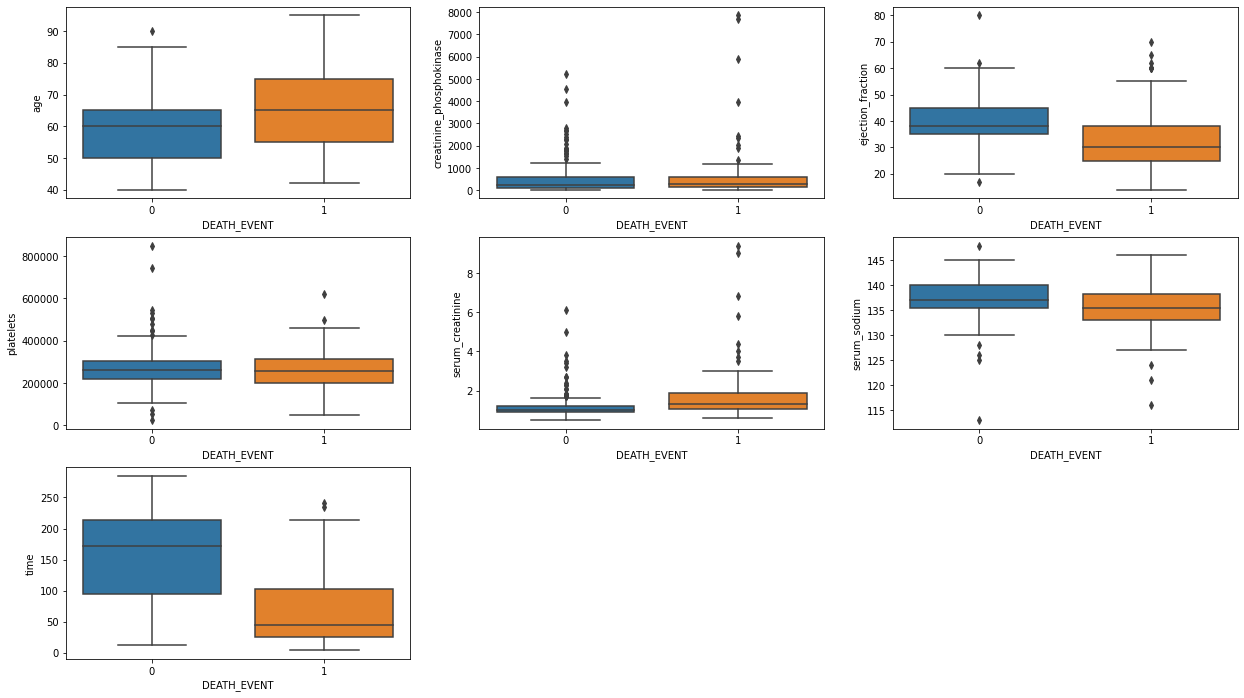

In [ ]:
draw_feature_boxplots(dataset_with_no_binary)

In [ ]:
df = dataset_with_no_binary.data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

age                          0
creatinine_phosphokinase    29
ejection_fraction            2
platelets                   21
serum_creatinine            29
serum_sodium                 4
time                         0
dtype: int64

# QSAR oral toxicity

There is 8892 records, which have 1025 axis, where are 1024 features and 1 binary class.

There is no missing values in any of feature.
Every feature is binary.

In [13]:
dataset_csv_name = 'qsar_oral_toxicity.csv'

In [71]:
df = load_dataset(dataset_csv_name,header=None,delimiter=';')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,negative
8988,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,negative
8989,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,negative
8990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative


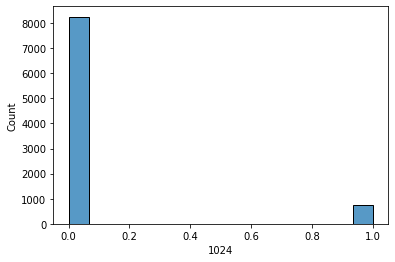

In [72]:
df[1024] = df[1024].map({'negative': 0,'positive': 1})
sns.histplot(df[1024])

In [110]:
s = pd.DataFrame(df.sum())
n = df.shape[0]
many_zeros = s[s[0]<n*0.05 ]
# many_ones = s[s[0]>n*0.9 ]
many_zeros

,0
1,321
3,300
4,168
8,124
9,156
...,...
1019,202
1020,198
1021,196
1022,201
